In [1]:
import numpy as np
from scipy.optimize import linprog
from ipynb.fs.full.functions import nn2na, get_selected_arcs
import matplotlib.pyplot as plt

In [2]:
#Import data
NN = np.array([[0, 1, 1, 0, 0, 0],
               [0, 0, 0, 1, 0, 1],
               [0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 0]])
beq = np.array([1, 0, 0, 0, 0, -1])
C = np.array([2, 1, 2, 5, 2, 1, 2])
t = np.array([[3, 1, 3, 1, 3, 3, 5]])
T = 8

In [3]:
# DATA transforming for optimization:
Aeq, arc_idxs, arc_idxs_list = nn2na(NN)
bounds = tuple([(0, None) for arcs in range(0, Aeq.shape[1])])

I define lambda vector with values between 0 and 1: 

In [4]:
lamb = [0]

I define the vector where afterwards we'll save (iteration by iteration) Langrange's values:

In [5]:
L_sequence = [0]
grad_L_sequence = [0]
Lmax = 0
tol = 10**-3
diff = 10 #initial value for first WHILE evaluation

I iterate for every lambda to find the value that gives the best value of OF:

In [6]:
while diff > tol:
    lag_c = C + t[0] * lamb[-1]
    res = linprog(lag_c, A_eq=Aeq, b_eq=beq, bounds=bounds, method='revised simplex')
    print(lamb[-1], res.x, np.dot(t[0],res.x))
    L = res.fun - lamb[-1] * T
    L_sequence.append(L)
    grad_L = np.dot(t[0],res.x) - T
    grad_L_sequence.append(L)
    step = 1 / len(lamb)
    lamb.append(lamb[-1] + step * grad_L)
    diff = abs(lamb[-1] - lamb[-2])


C:\Users\joaquin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  This is separate from the ipykernel package so we can avoid doing imports until


0 [0. 1. 0. 0. 1. 0. 1.] 9.0
1.0 [1. 0. 0. 1. 0. 0. 0.] 4.0
-1.0 [0. 1. 0. 0. 1. 0. 1.] 9.0
-0.6666666666666667 [0. 1. 0. 0. 1. 0. 1.] 9.0
-0.41666666666666674 [0. 1. 0. 0. 1. 0. 1.] 9.0
-0.21666666666666673 [0. 1. 0. 0. 1. 0. 1.] 9.0
-0.05000000000000007 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.09285714285714278 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.21785714285714278 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.3289682539682539 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.4289682539682539 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.06533189033189024 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.14866522366522356 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.22558830058830048 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.2970168720168719 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.36368353868353853 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.42618353868353853 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.1908894210364797 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.24644497659203526 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.2990765555394037 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.3490765555394037 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.3966956031584513 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.4421501486129968 

0.4039356706462429 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.3840351731338051 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.38898566818331004 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.39391177655769427 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.398813737342008 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.4036917861224958 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.38427431039434046 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.3891052282687366 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.3939129205764289 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.39869760957164424 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.403459514333549 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.38450216836198503 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.3892191494940605 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.3939139851748117 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.39858688237107337 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.40323804516177103 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.3847195266432525 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.38932782157412804 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.39391497753743077 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.39848118758309287 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.4030266421285474 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.3849270946172352 [0. 1. 

0.39696861502036945 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.39956601761777205 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.4021566911929016 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.3918207738802401 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.39439809346786897 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.3969687875552726 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.39953289011937515 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.4020904348764084 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.3918863532437553 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.39443088250584185 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.3969689535718317 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.399500599141452 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.4020258516667045 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.3919502849160748 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.39446284773014517 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.3969691133943056 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.3994691133943056 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.4019628789803405 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.3920126302241216 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.3944940198022854 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.39696926732703786 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.399438403129507 [1. 0. 1. 

0.395214826392006 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.3969722956362942 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.3987266816012065 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.4004779950863203 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.39348498809331334 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.3952301887913936 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.39697234907013923 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.39871147950492186 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.40044759061603297 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.39351518160390125 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.39524528541012965 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.3969724011268827 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.3986965390579172 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.40041770945378635 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.3935448572201094 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.39526012308631864 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.39697245185344193 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.39868185356284364 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.4003883382044819 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.39357402815337456 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.3952747084254834 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.39697250129475337 [0. 

0.3997914629020162 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.40110379886002145 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.3958613349019612 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.3971702354255214 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.39847742496800503 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.39978290799672567 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.4010866889615236 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.3958783556281903 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.3971787457452254 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.3984774470439267 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.39977446390514587 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.40106980069271064 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.39589515644950235 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.397187146113585 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.3984774686942302 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.3997661284880446 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.40105312977504587 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.3959117416002387 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.3971954386477355 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.39847748992978677 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.3997578996609007 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.40103667203941734 [1. 0. 

0.3984780475330894 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.39951863025941614 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.40055813129891715 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.3964044449022401 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.39744178930058033 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.39847805873063213 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.39951325541800276 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.4005473815813947 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.396415150176436 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.39744714192050207 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.3984780697555536 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.39950793587295835 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.4005367424573205 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.3964257455405682 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.3974524395857427 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.39847808061138373 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.39950267077531815 [1. 0. 1. 0. 0. 1. 0.] 9.0
0.400526212228747 [1. 0. 0. 1. 0. 0. 0.] 4.0
0.39643623267864475 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.39745768313829744 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.39847809130156275 [0. 1. 0. 0. 1. 0. 1.] 9.0
0.3994974592934078 [0. 1

In [7]:
print(np.dot(t[0],res.x), res.x)

9.0 [0. 1. 0. 0. 1. 0. 1.]


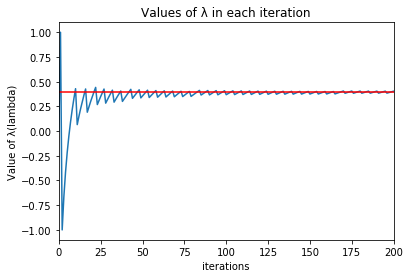

In [8]:
plt.plot(range(len(lamb)),lamb)
plt.xlabel('iterations')
plt.xlim((0,200))
plt.ylabel('Value of λ(lambda)')
plt.title('Values of λ in each iteration')
plt.axhline(y=lamb[-1], color='r', linestyle='-')
plt.show()

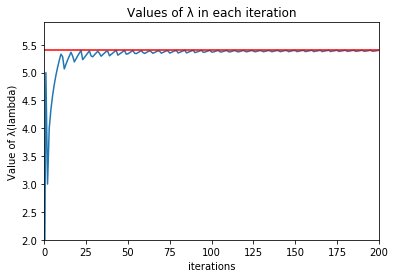

In [9]:
plt.plot(range(len(L_sequence)),L_sequence)
plt.xlim((0,200))
plt.ylim((np.min(L_sequence)+2,np.max(L_sequence)+0.5))
plt.xlabel('iterations')
plt.ylabel('Value of λ(lambda)')
plt.title('Values of λ in each iteration')
plt.axhline(y=L_sequence[-1], color='r', linestyle='-')
plt.show()

In [10]:
opt_time = np.sum(res.x * t)
selarcs = get_selected_arcs(arc_idxs, res.x)

In [11]:
print('The value of lambda that maximizes the function is: %s \n'
      'And the objective function (modified) takes the value of: %s \n'
      'The arcs that make the shortest path are: %s \n'
      'The shortest path takes %s time units to be covered'%(lamb[-1],L_sequence[-1],selarcs, opt_time))

The value of lambda that maximizes the function is: 0.39947713347058217 
And the objective function (modified) takes the value of: 5.398478132471581 
The arcs that make the shortest path are: [(0, 2), (2, 4), (4, 5)] 
The shortest path takes 9.0 time units to be covered


We see here that, although our model made a perfect aproximation to lambda's value, we did not arrive to the optimum solution. In fact, the path selected does not fulfill the main restriction. We ask the model to find a path that takes a total of less or equal than 8 time units, and the recommended path fails. 